In [1]:
import pandas as pd


file_path = 'data_processed.csv'
data = pd.read_csv(file_path)


data_info = {
    "shape": data.shape,
    "columns": data.columns.tolist(),
    "sample_data": data.head(),
    "missing_values": data.isnull().sum().to_dict(),
    "data_types": data.dtypes.to_dict()
}

data_info


{'shape': (12016, 12),
 'columns': ['id',
  'gender',
  'age',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'avg_glucose_level',
  'bmi',
  'smoking_status',
  'stroke'],
 'sample_data':    id  gender   age  hypertension  heart_disease ever_married      work_type  \
 0   1    Male  67.0             0              1          Yes        Private   
 1   2  Female  61.0             0              0          Yes  Self-employed   
 2   3    Male  80.0             0              1          Yes        Private   
 3   4  Female  49.0             0              0          Yes        Private   
 4   5  Female  79.0             1              0          Yes  Self-employed   
 
   Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
 0          Urban             228.69  36.6  formerly smoked       1  
 1          Rural             202.21  28.7     never smoked       1  
 2          Rural             105.92  32.5     never smoked       1  

In [2]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Tiền xử lý dữ liệu bị thiếu BMI thiếu nên điền vào bằng trung vị

C:\Users\ACER\AppData\Local\Temp\ipykernel_4860\964469295.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(median_bmi, inplace=True)


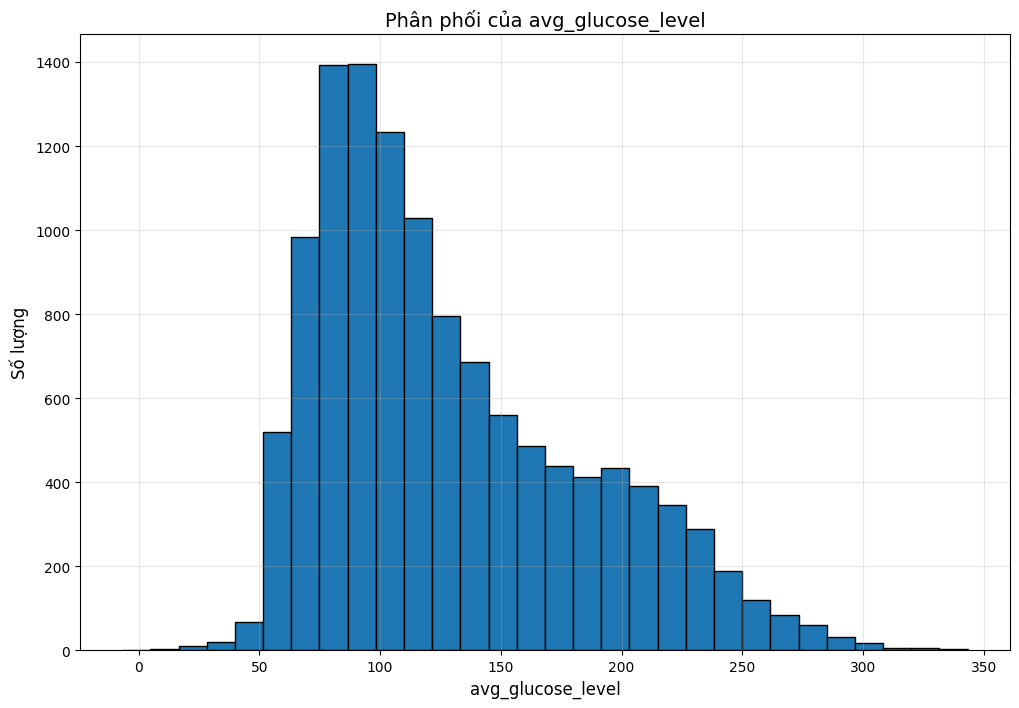

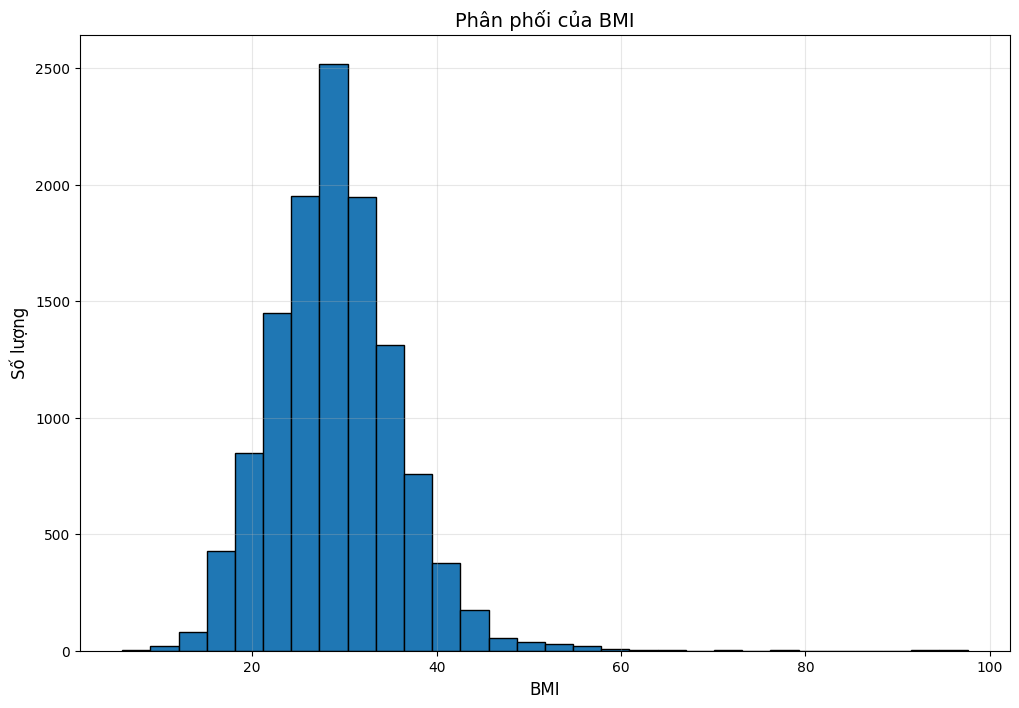

,avg_glucose_level,bmi
count,12016.000000,12016.000000
mean,129.023873,29.004519
std,54.619725,6.734227
min,-6.790000,5.900000
25%,86.607500,24.600000
50%,113.560000,28.700000
75%,163.925000,33.100000
max,343.340000,97.600000


In [3]:
import matplotlib.pyplot as plt


median_bmi = data['bmi'].median()
data['bmi'].fillna(median_bmi, inplace=True)


plt.figure(figsize=(12, 8))
plt.hist(data['avg_glucose_level'], bins=30, edgecolor='black')
plt.title('Phân phối của avg_glucose_level', fontsize=14)
plt.xlabel('avg_glucose_level', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
plt.hist(data['bmi'], bins=30, edgecolor='black')
plt.title('Phân phối của BMI', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


description = data[['avg_glucose_level', 'bmi']].describe()
description

Một vài phân tích các số 

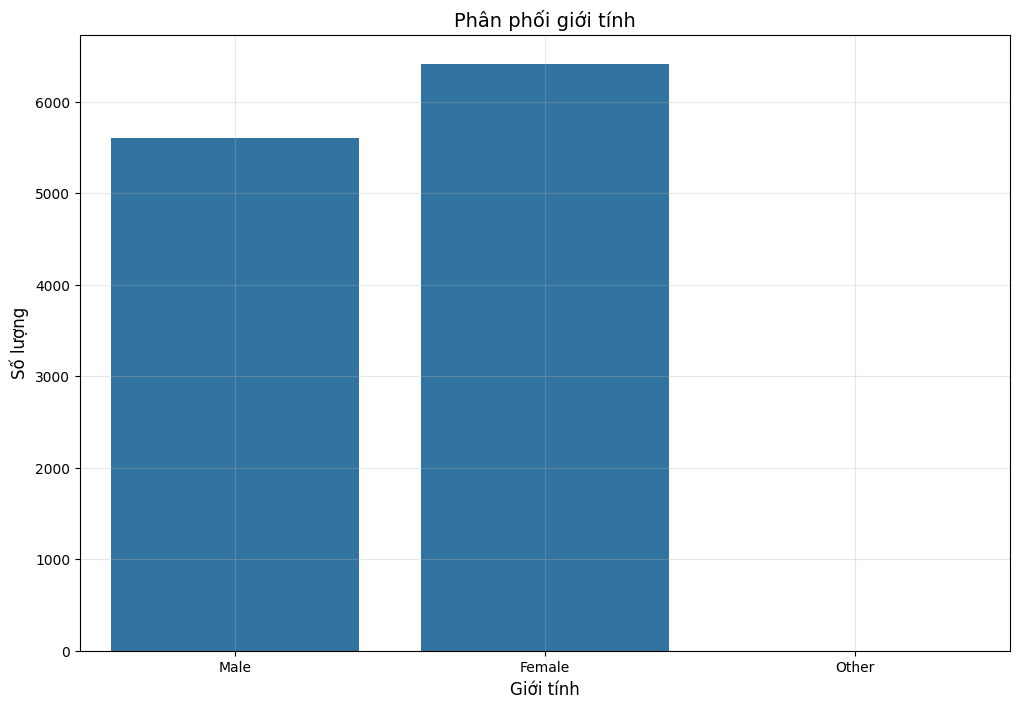

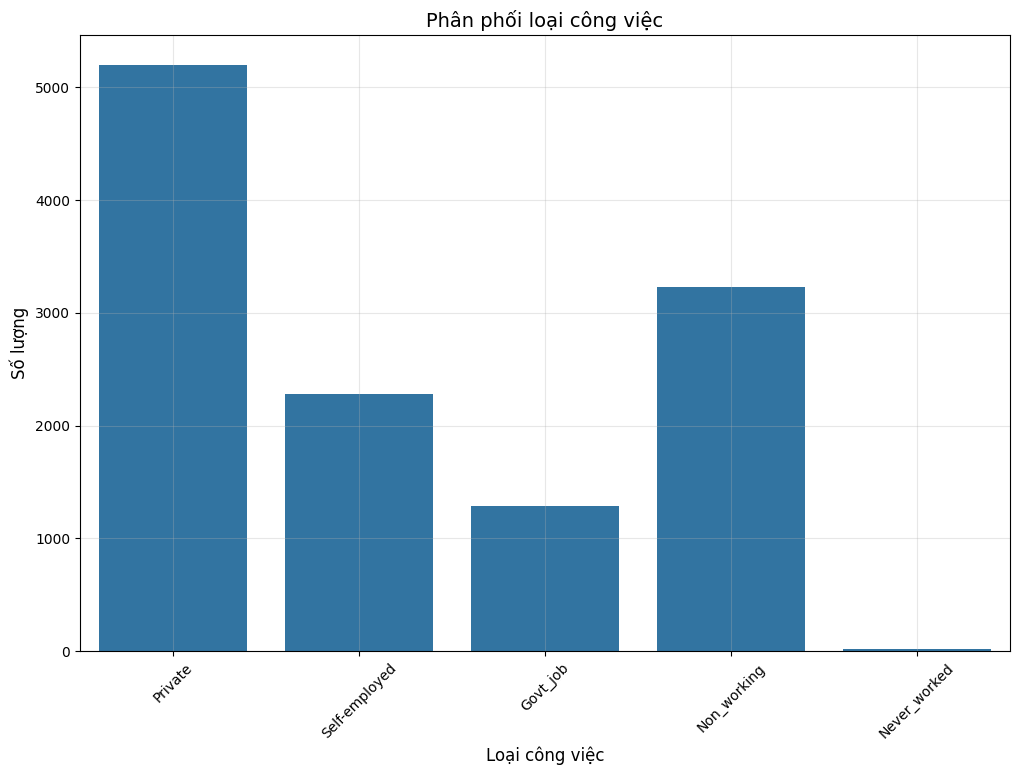

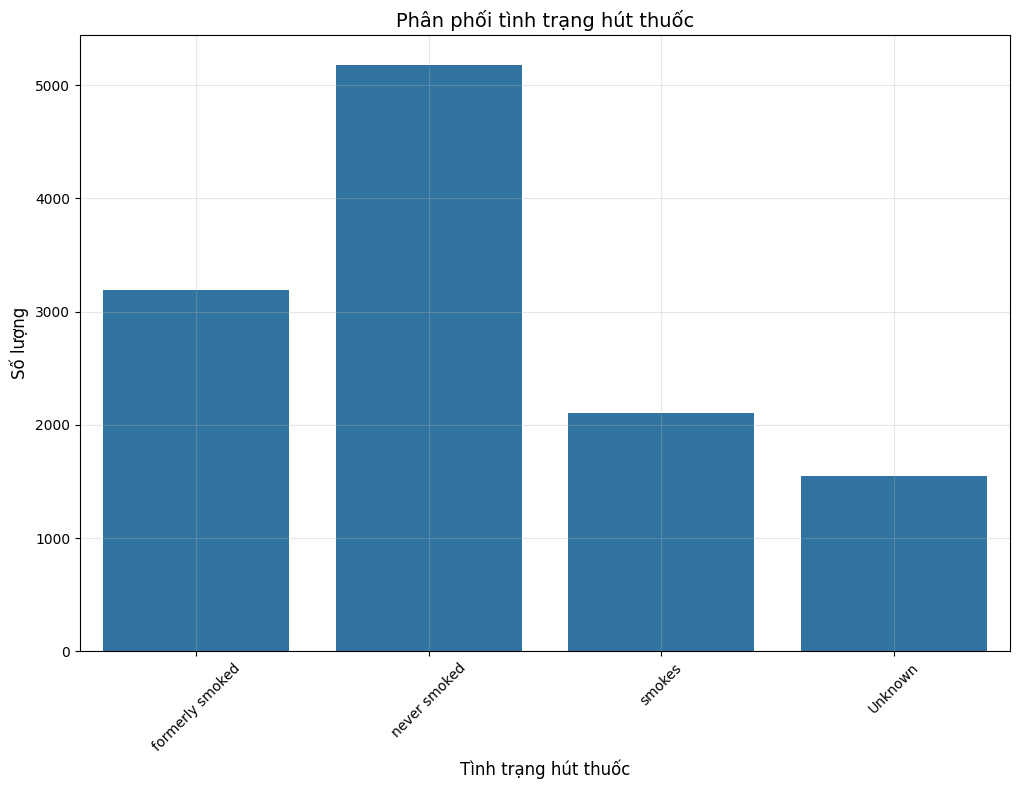

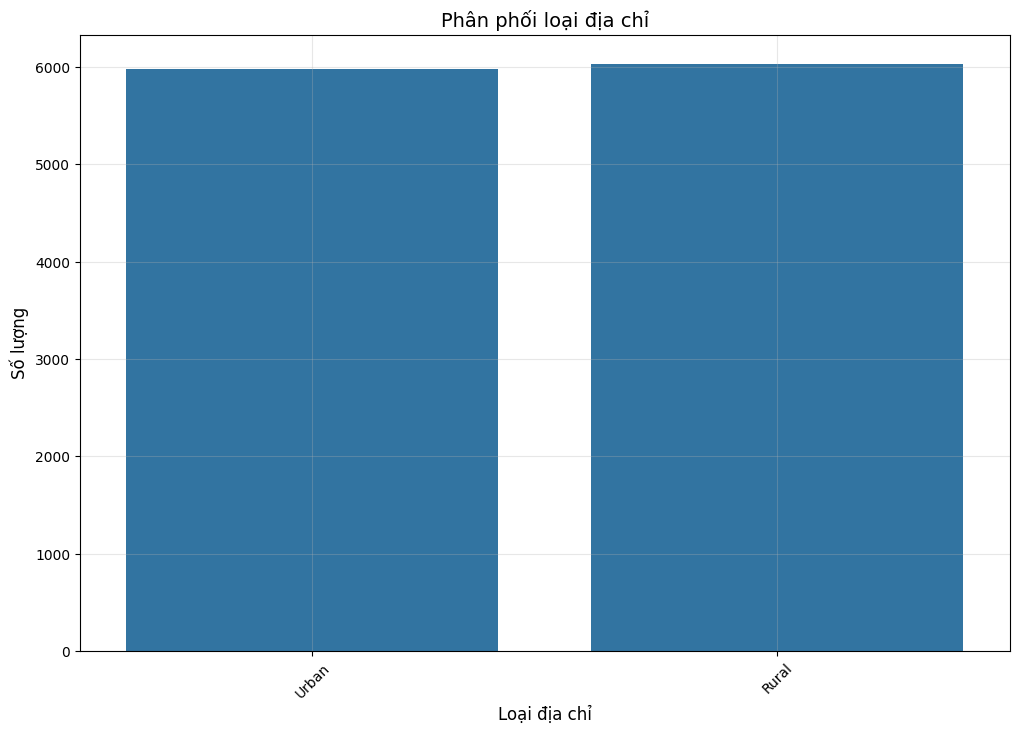

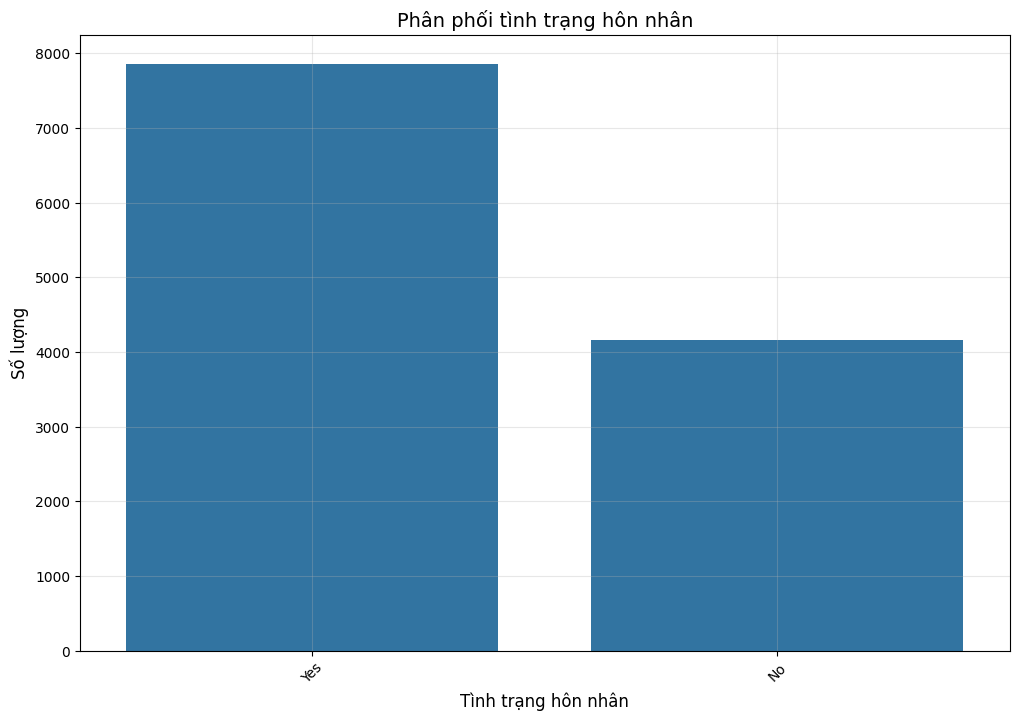

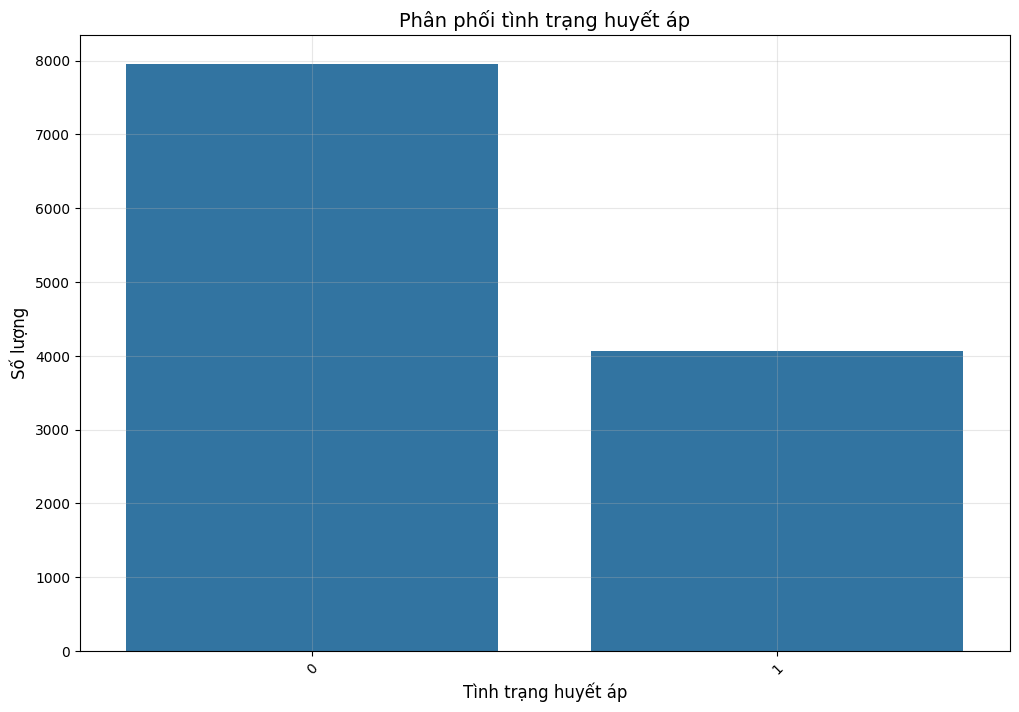

,age,avg_glucose_level,bmi
count,12016.000000,12016.000000,12016.000000
mean,49.216045,129.023873,29.004519
std,22.281537,54.619725,6.734227
min,0.080000,-6.790000,5.900000
25%,32.000000,86.607500,24.600000
50%,50.000000,113.560000,28.700000
75%,67.000000,163.925000,33.100000
max,90.000000,343.340000,97.600000


In [4]:
import seaborn as sns


numeric_columns = ['age', 'avg_glucose_level', 'bmi']
description_numeric = data[numeric_columns].describe()


plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='gender')
plt.title('Phân phối giới tính', fontsize=14)
plt.xlabel('Giới tính', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='work_type')
plt.title('Phân phối loại công việc', fontsize=14)
plt.xlabel('Loại công việc', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='smoking_status')
plt.title('Phân phối tình trạng hút thuốc', fontsize=14)
plt.xlabel('Tình trạng hút thuốc', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Residence_type')
plt.title('Phân phối loại địa chỉ', fontsize=14)
plt.xlabel('Loại địa chỉ', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='ever_married')
plt.title('Phân phối tình trạng hôn nhân', fontsize=14)
plt.xlabel('Tình trạng hôn nhân', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='hypertension')
plt.title('Phân phối tình trạng huyết áp', fontsize=14)
plt.xlabel('Tình trạng huyết áp', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

description_numeric

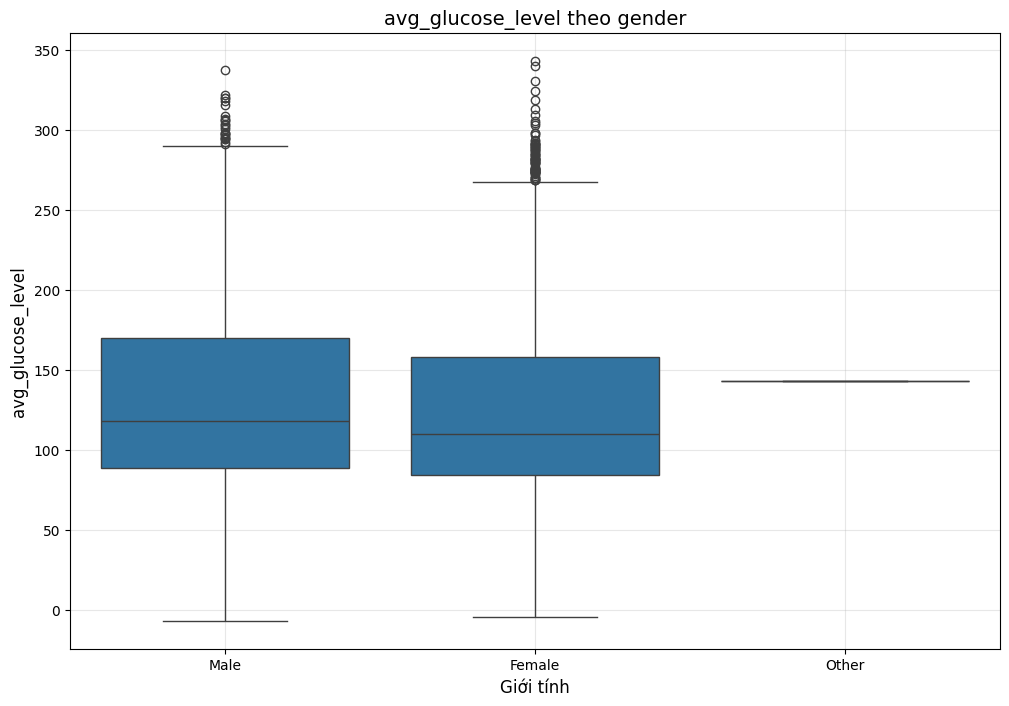

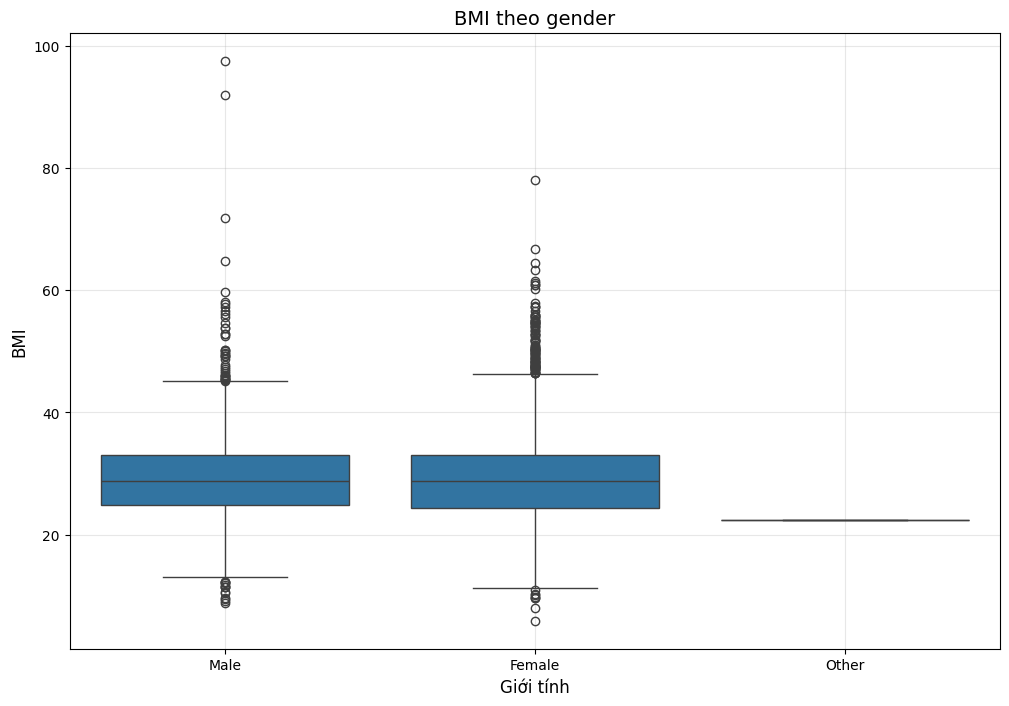

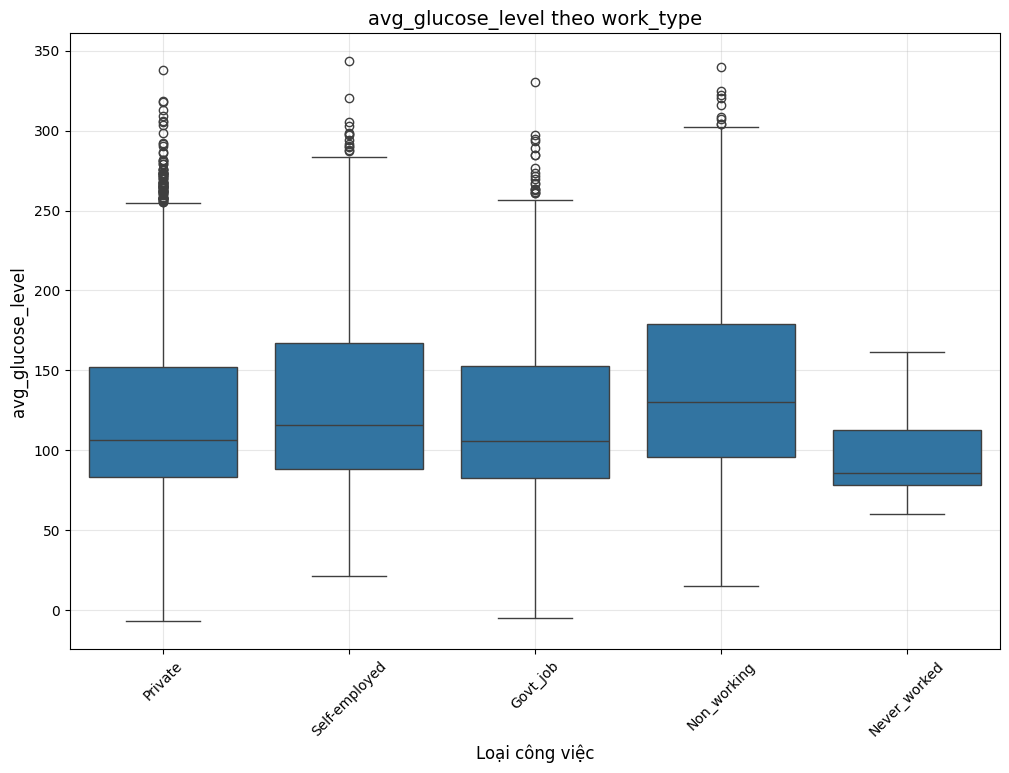

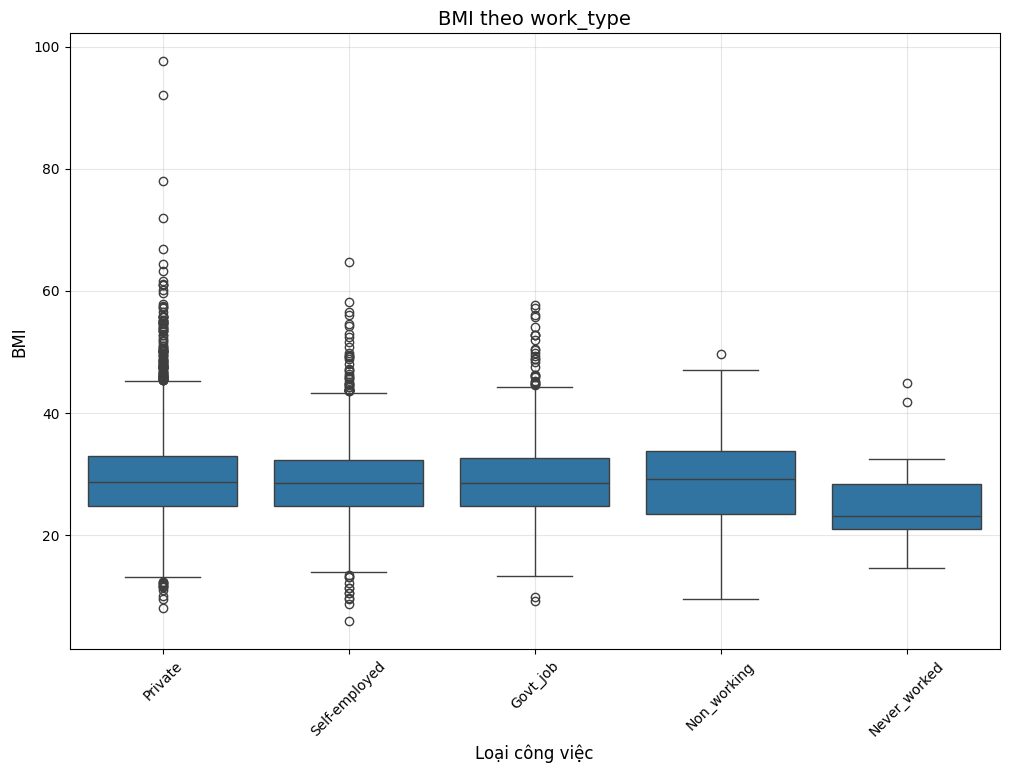

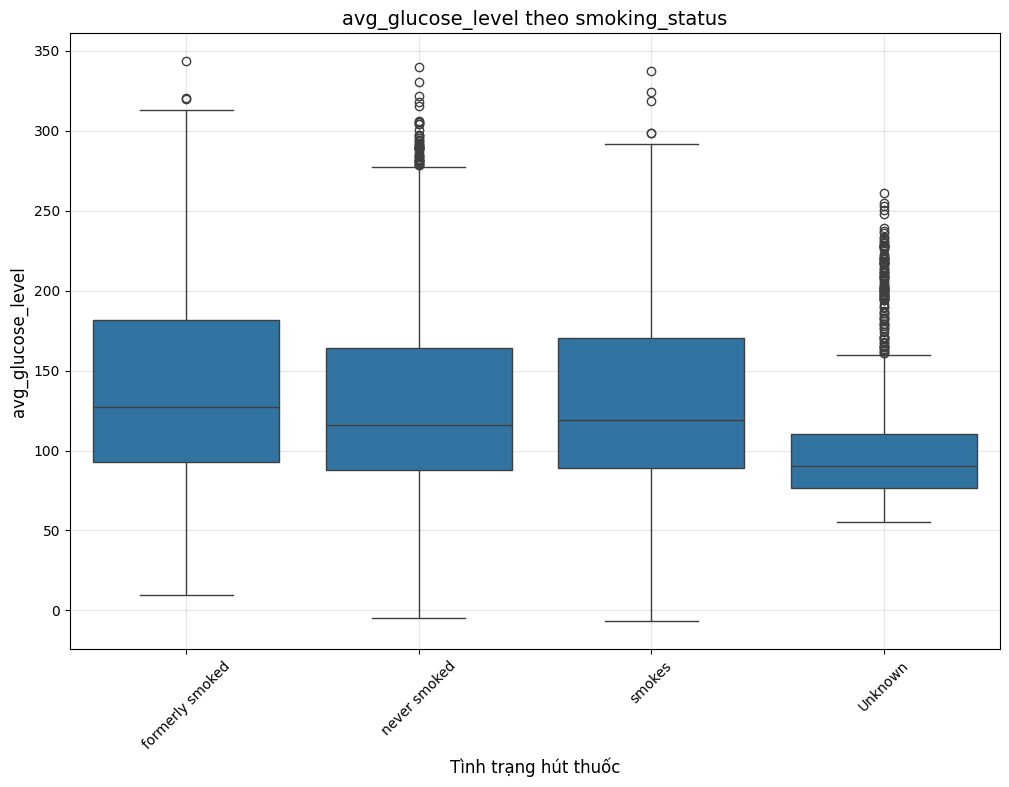

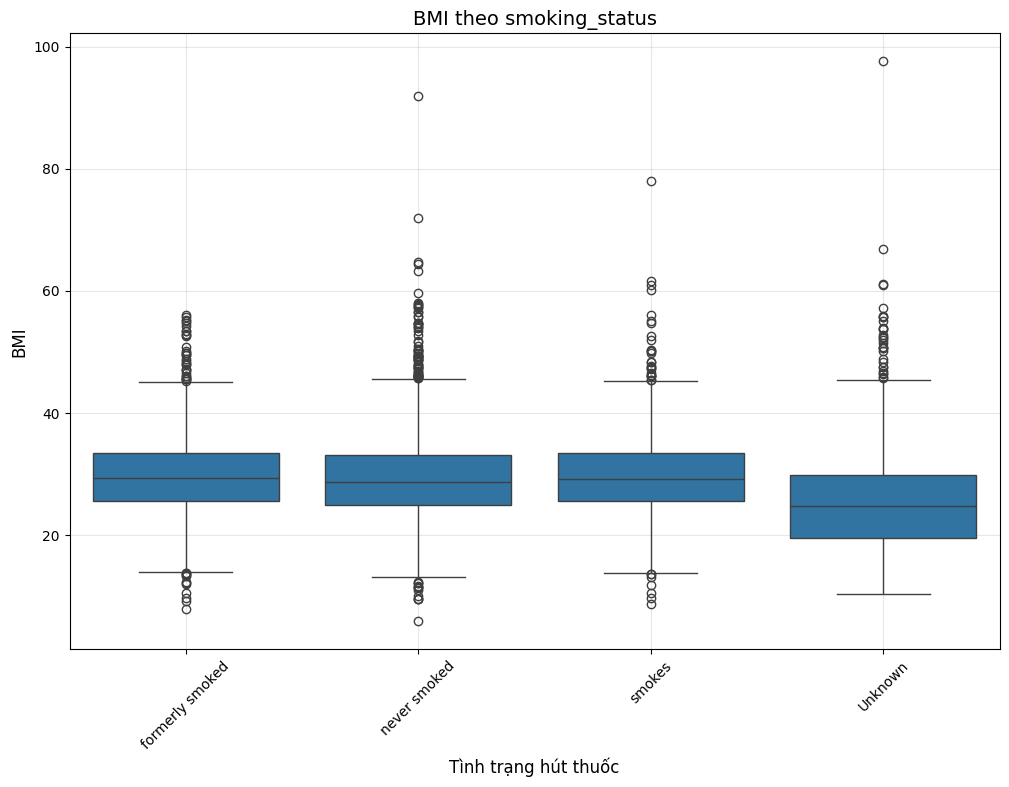

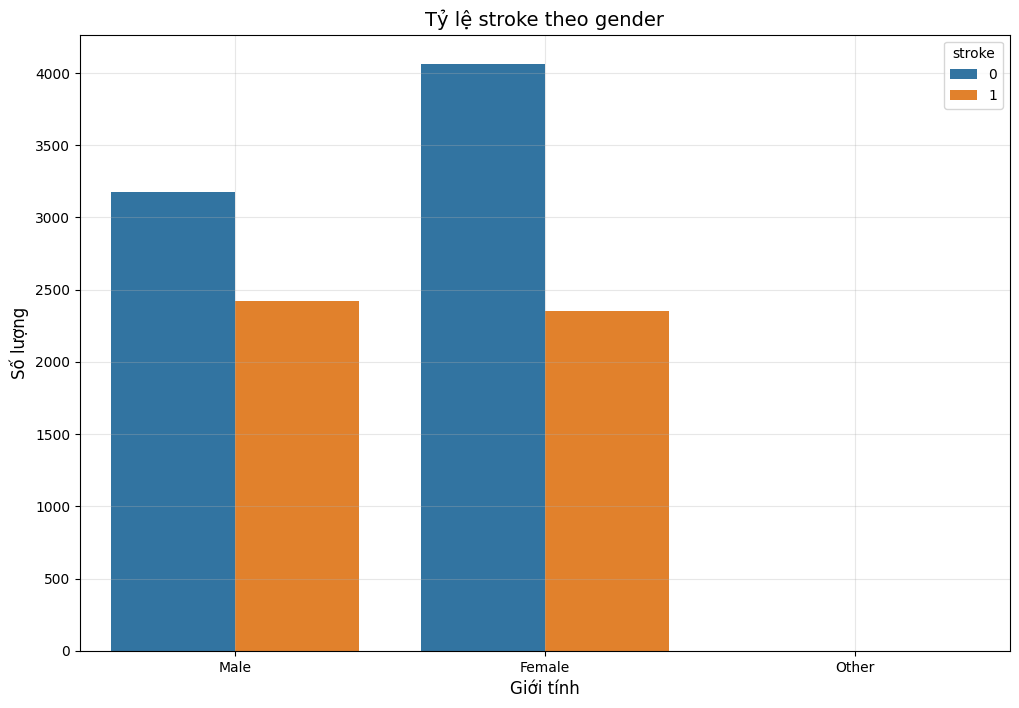

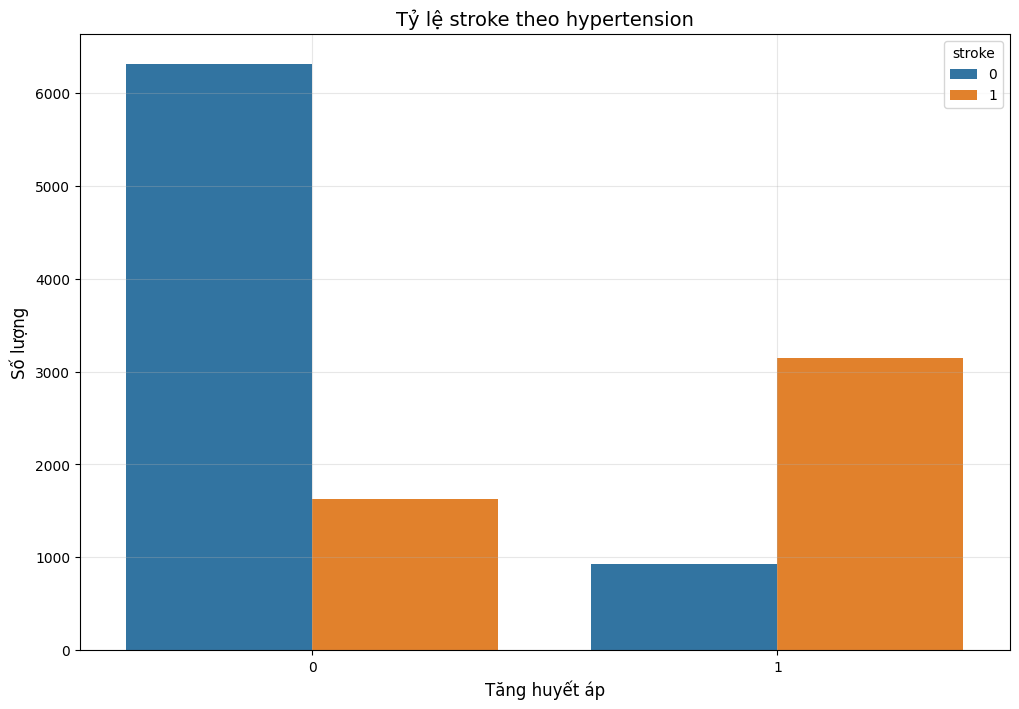

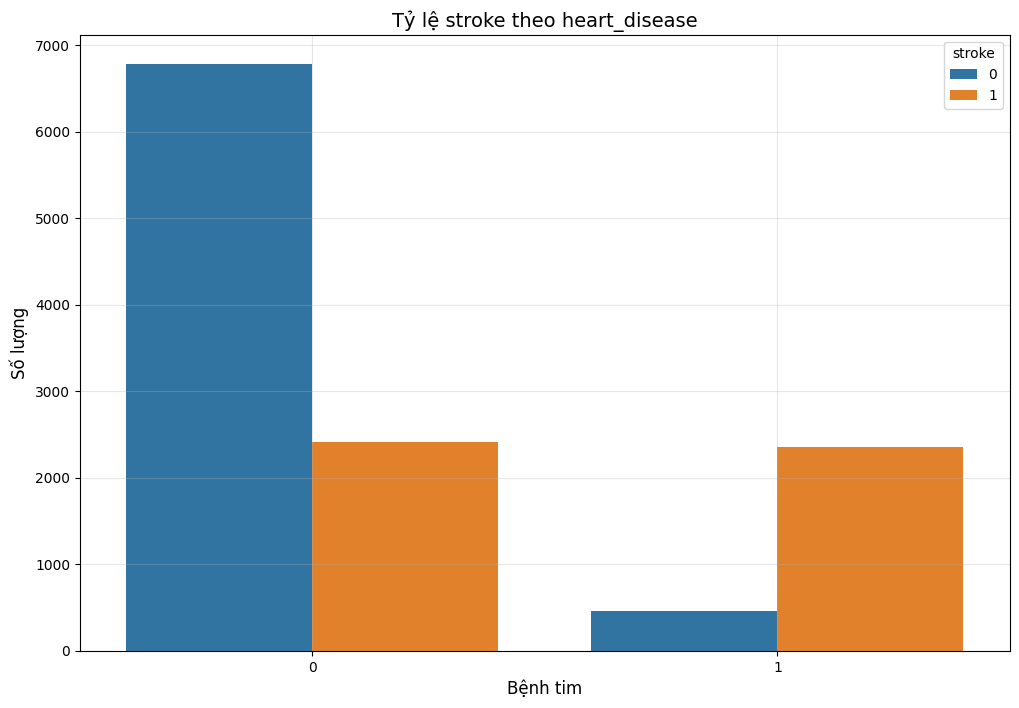

In [5]:
# Trực quan hóa so sánh avg_glucose_level và bmi theo các biến phân loại

# 1. Biểu đồ theo gender
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='gender', y='avg_glucose_level')
plt.title('avg_glucose_level theo gender', fontsize=14)
plt.xlabel('Giới tính', fontsize=12)
plt.ylabel('avg_glucose_level', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='gender', y='bmi')
plt.title('BMI theo gender', fontsize=14)
plt.xlabel('Giới tính', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Biểu đồ theo work_type
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='work_type', y='avg_glucose_level')
plt.title('avg_glucose_level theo work_type', fontsize=14)
plt.xlabel('Loại công việc', fontsize=12)
plt.ylabel('avg_glucose_level', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='work_type', y='bmi')
plt.title('BMI theo work_type', fontsize=14)
plt.xlabel('Loại công việc', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# 3. Biểu đồ theo smoking_status
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='smoking_status', y='avg_glucose_level')
plt.title('avg_glucose_level theo smoking_status', fontsize=14)
plt.xlabel('Tình trạng hút thuốc', fontsize=12)
plt.ylabel('avg_glucose_level', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='smoking_status', y='bmi')
plt.title('BMI theo smoking_status', fontsize=14)
plt.xlabel('Tình trạng hút thuốc', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# 4. Biểu đồ phân tích stroke
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='gender', hue='stroke')
plt.title('Tỷ lệ stroke theo gender', fontsize=14)
plt.xlabel('Giới tính', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='hypertension', hue='stroke')
plt.title('Tỷ lệ stroke theo hypertension', fontsize=14)
plt.xlabel('Tăng huyết áp', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='heart_disease', hue='stroke')
plt.title('Tỷ lệ stroke theo heart_disease', fontsize=14)
plt.xlabel('Bệnh tim', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

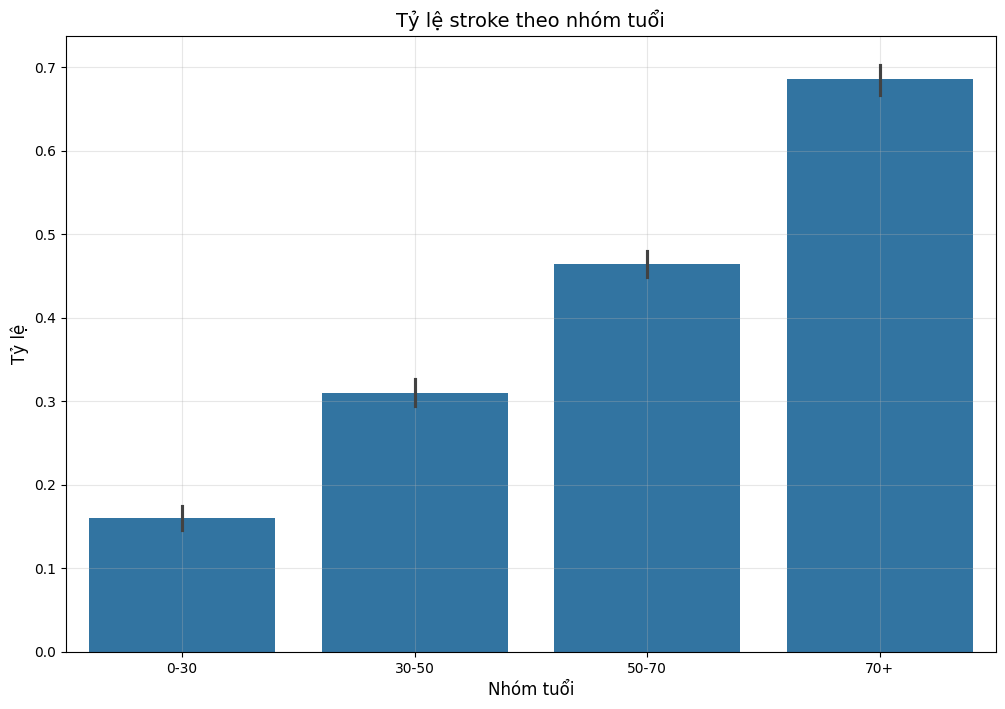

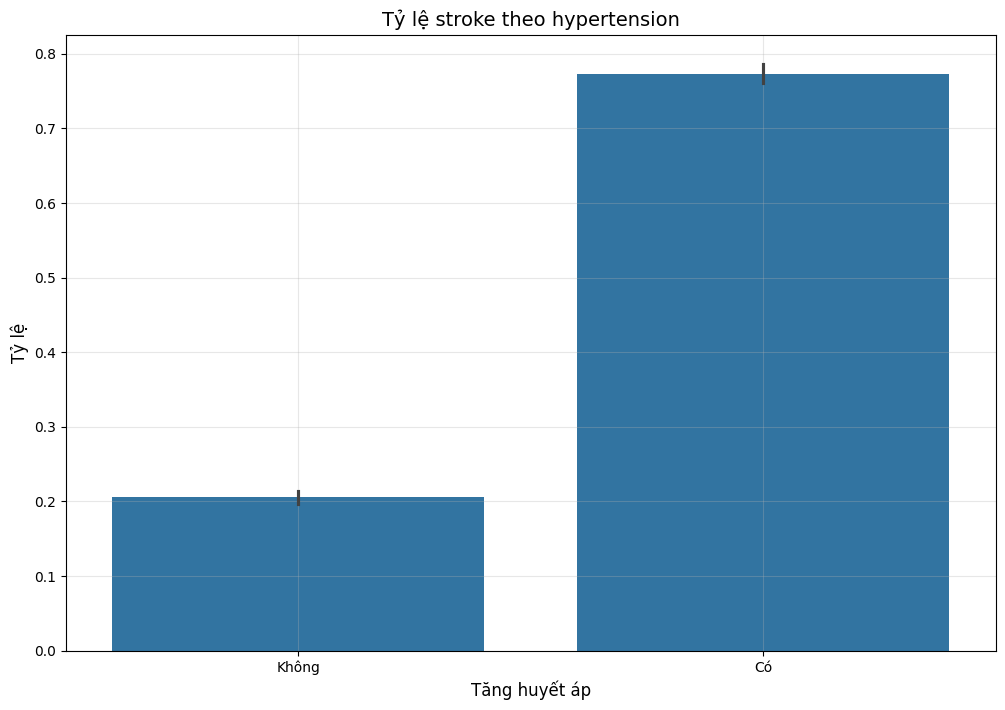

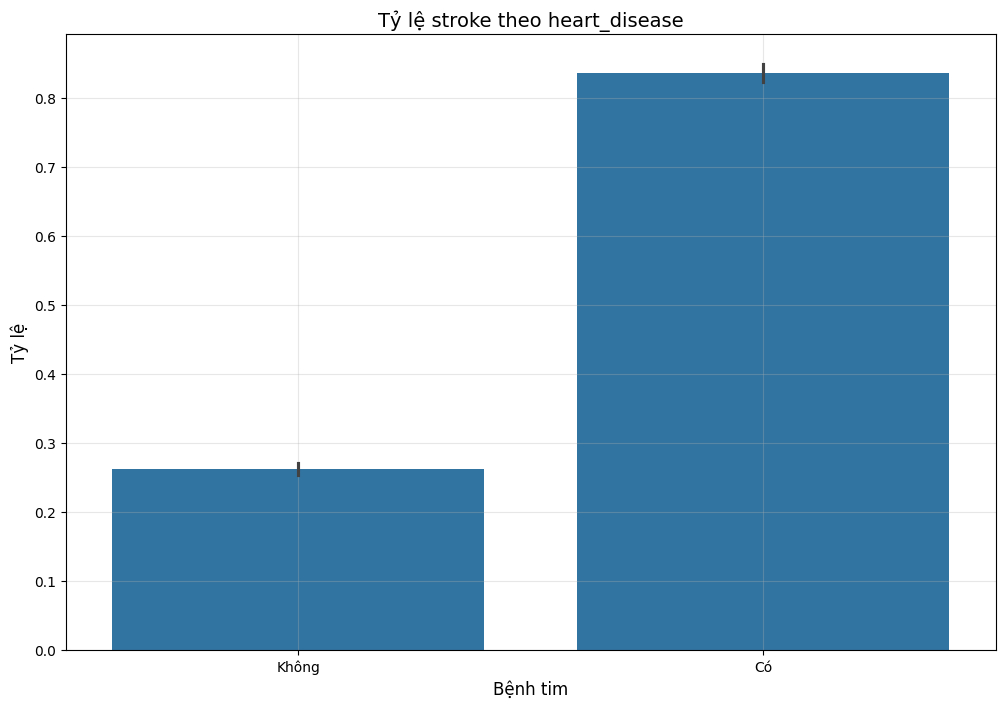

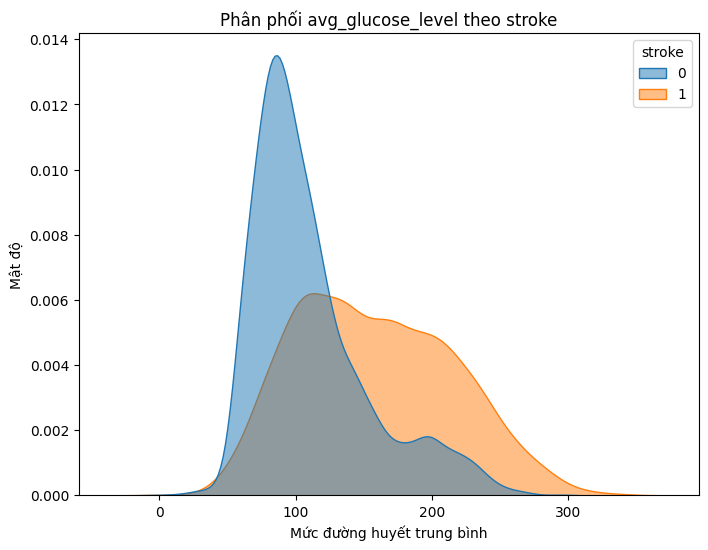

In [6]:
# Tỷ lệ stroke theo tuổi (chia nhóm tuổi)
data['age_group'] = pd.cut(data['age'], bins=[0, 30, 50, 70, 90], labels=['0-30', '30-50', '50-70', '70+'])

# 1. Tỷ lệ stroke theo nhóm tuổi
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='age_group', y='stroke', estimator=lambda x: sum(x)/len(x))
plt.title('Tỷ lệ stroke theo nhóm tuổi', fontsize=14)
plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Tỷ lệ', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Tỷ lệ stroke theo hypertension
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='hypertension', y='stroke', estimator=lambda x: sum(x)/len(x))
plt.title('Tỷ lệ stroke theo hypertension', fontsize=14)
plt.xlabel('Tăng huyết áp', fontsize=12)
plt.ylabel('Tỷ lệ', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Không', 'Có'])
plt.grid(True, alpha=0.3)
plt.show()

# 3. Tỷ lệ stroke theo heart_disease
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='heart_disease', y='stroke', estimator=lambda x: sum(x)/len(x))
plt.title('Tỷ lệ stroke theo heart_disease', fontsize=14)
plt.xlabel('Bệnh tim', fontsize=12)
plt.ylabel('Tỷ lệ', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Không', 'Có'])
plt.grid(True, alpha=0.3)
plt.show()

# Phân phối avg_glucose_level theo stroke
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='avg_glucose_level', hue='stroke', fill=True, common_norm=False, alpha=0.5)
plt.title('Phân phối avg_glucose_level theo stroke')
plt.xlabel('Mức đường huyết trung bình')
plt.ylabel('Mật độ')
plt.show()
# Tỷ lệ stroke theo tình trạng hút thuốc



C:\Users\ACER\AppData\Local\Temp\ipykernel_4860\3075069980.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=smoking_stroke, x='smoking_status', y='stroke', palette="viridis")


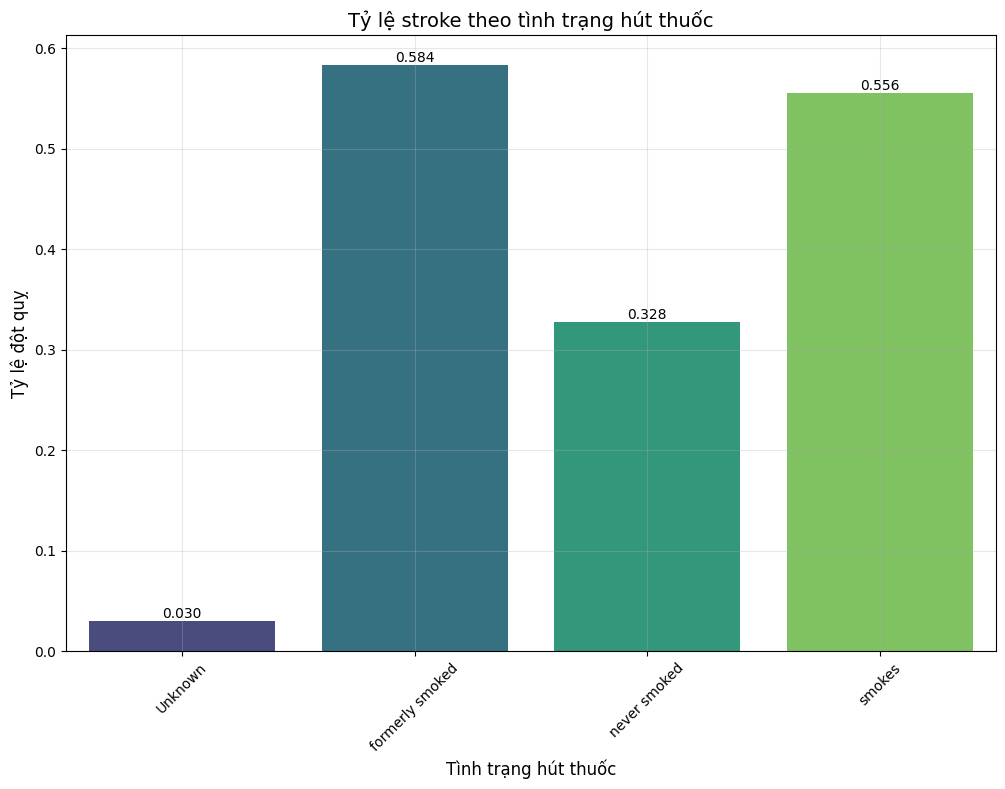

,smoking_status,stroke
0,Unknown,0.030440
1,formerly smoked,0.583830
2,never smoked,0.327606
3,smokes,0.555926


In [7]:
smoking_stroke = data.groupby('smoking_status')['stroke'].mean().reset_index()

# Vẽ biểu đồ tỷ lệ stroke theo tình trạng hút thuốc
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=smoking_stroke, x='smoking_status', y='stroke', palette="viridis")
plt.title('Tỷ lệ stroke theo tình trạng hút thuốc', fontsize=14)
plt.xlabel('Tình trạng hút thuốc', fontsize=12)
plt.ylabel('Tỷ lệ đột quỵ', fontsize=12)
plt.xticks(rotation=45)

# Thêm nhãn giá trị trên các cột
for index, row in smoking_stroke.iterrows():
    ax.text(index, row['stroke'], f"{row['stroke']:.3f}", 
            color='black', ha="center", va="bottom")

plt.grid(True, alpha=0.3)
plt.show()

# Hiển thị dữ liệu thô
smoking_stroke

Model 


Báo cáo phân loại - Hồi quy logistic:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2172
           1       0.79      0.76      0.78      1433

    accuracy                           0.83      3605
   macro avg       0.82      0.81      0.82      3605
weighted avg       0.82      0.83      0.82      3605



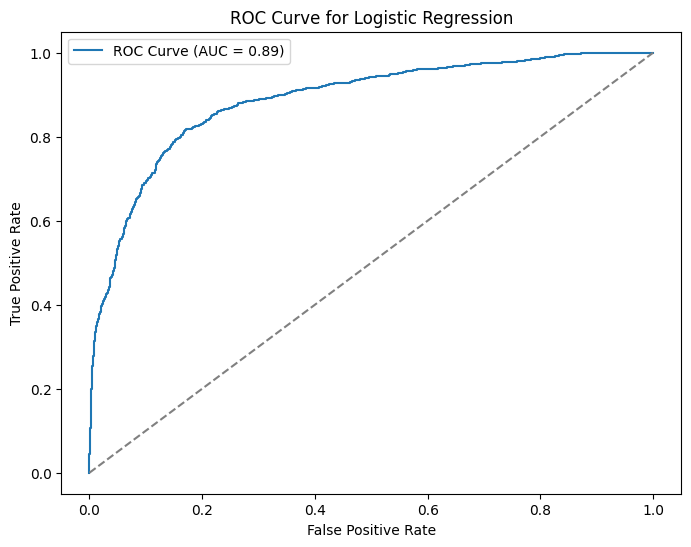

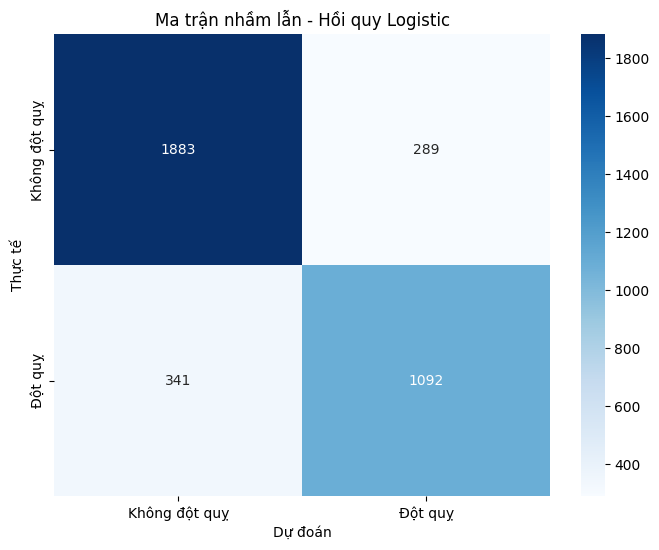

Các lớp trong biến mục tiêu (y): [0 1]
Số lượng lớp: 2


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix


data_encoded = data.copy()
label_encoders = {}
categorical_cols = ['gender', 'work_type', 'smoking_status', 'Residence_type', 'ever_married']

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

X = data_encoded[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
                  'gender', 'work_type', 'smoking_status']]
y = data_encoded['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)


log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)


y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


classification_rep = classification_report(y_test, y_pred)
print("Báo cáo phân loại - Hồi quy logistic:")
print(classification_rep)
roc_auc = roc_auc_score(y_test, y_pred_proba)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

conf_matrix_logreg = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Không đột quỵ", "Đột quỵ"],
            yticklabels=["Không đột quỵ", "Đột quỵ"])
plt.title("Ma trận nhầm lẫn - Hồi quy Logistic")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

Báo cáo phân loại - Hồi quy tuyến tính:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2172
           1       0.79      0.77      0.78      1433

    accuracy                           0.82      3605
   macro avg       0.82      0.82      0.82      3605
weighted avg       0.82      0.82      0.82      3605



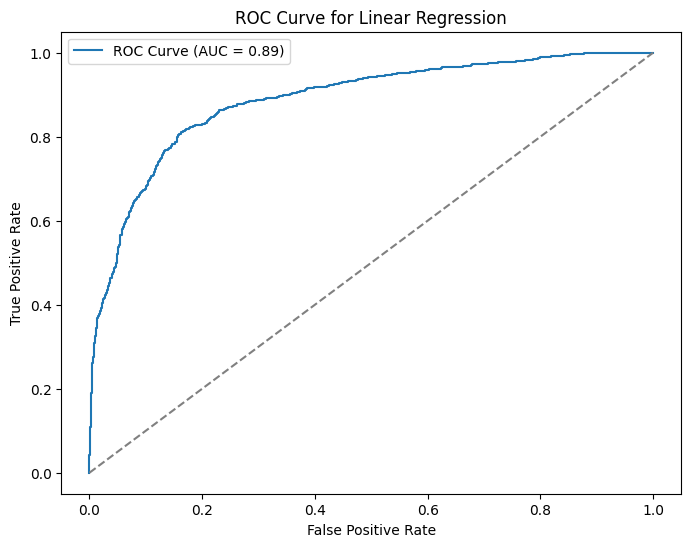

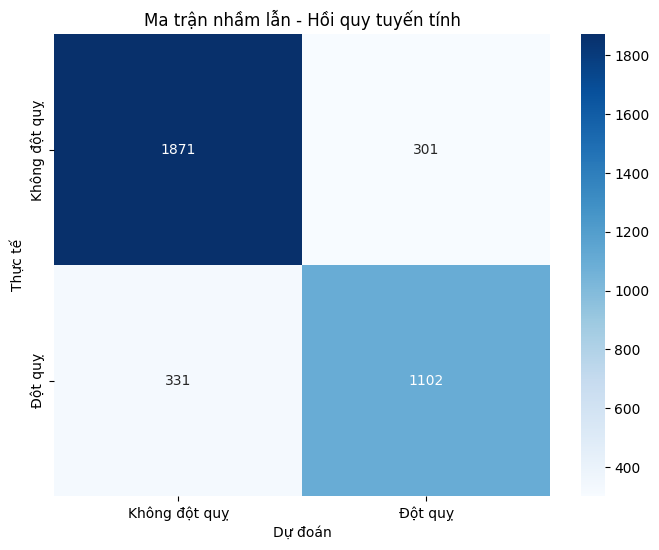

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Sử dụng mô hình hồi quy tuyến tính
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_linear = linear_reg.predict(X_test_scaled)

# Làm tròn giá trị dự đoán thành nhãn phân loại
y_pred_rounded = np.round(y_pred_linear).astype(int)

# Báo cáo kết quả
classification_rep_linear = classification_report(y_test, y_pred_rounded)
print("Báo cáo phân loại - Hồi quy tuyến tính:")
print(classification_rep_linear)

# Tính toán AUC và vẽ đường ROC
roc_auc_linear = roc_auc_score(y_test, y_pred_linear)

fpr_linear, tpr_linear, thresholds_linear = roc_curve(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, label=f'ROC Curve (AUC = {roc_auc_linear:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Linear Regression')
plt.legend()
plt.show()

# Ma trận nhầm lẫn
conf_matrix_linear = confusion_matrix(y_test, y_pred_rounded)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Không đột quỵ", "Đột quỵ"],
            yticklabels=["Không đột quỵ", "Đột quỵ"])
plt.title("Ma trận nhầm lẫn - Hồi quy tuyến tính")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()


In [10]:
# Re-importing necessary libraries and loading data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data_encoded = data.copy()
categorical_cols = ['gender', 'work_type', 'smoking_status', 'Residence_type', 'ever_married']

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])


X_rf = data_encoded[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender', 'work_type', 'smoking_status']]
y_rf = data_encoded['stroke']


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42, stratify=y_rf)


rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_model.predict(X_test_rf)
y_pred_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]


rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
rf_auc = roc_auc_score(y_test_rf, y_pred_proba_rf)
classification_rep_rf = classification_report(y_test_rf, y_pred_rf)
print("Báo cáo phân loại - Rừng ngẫu nhiên:")
print(classification_rep_rf)

conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

feature_importances = rf_model.feature_importances_
important_features = pd.DataFrame({
    'Feature': X_rf.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


Báo cáo phân loại - Rừng ngẫu nhiên:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2172
           1       0.82      0.76      0.79      1433

    accuracy                           0.84      3605
   macro avg       0.84      0.83      0.83      3605
weighted avg       0.84      0.84      0.84      3605



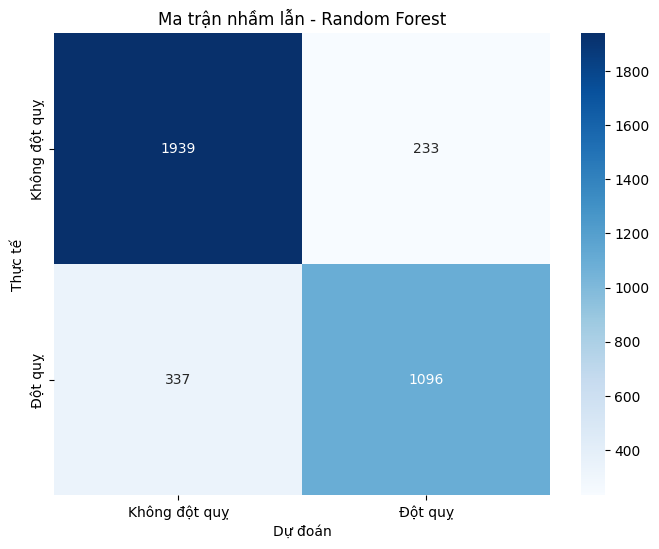

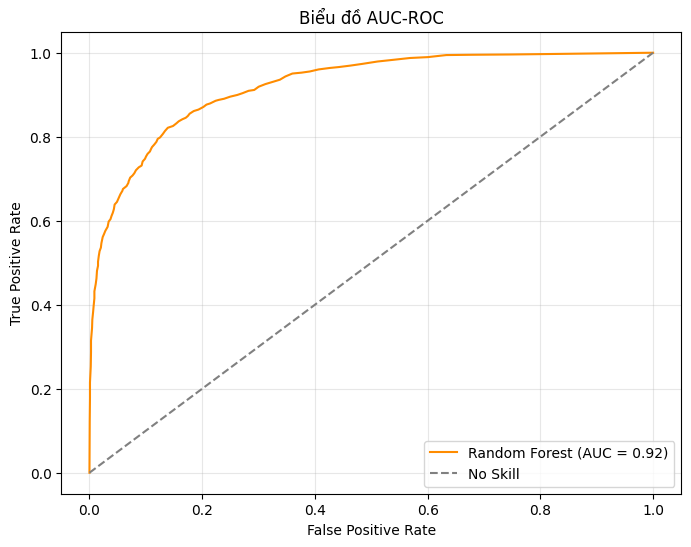

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Không đột quỵ", "Đột quỵ"],
            yticklabels=["Không đột quỵ", "Đột quỵ"])
plt.title("Ma trận nhầm lẫn - Random Forest")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()


fpr, tpr, thresholds = roc_curve(y_test_rf, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label="No Skill")
plt.title("Biểu đồ AUC-ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


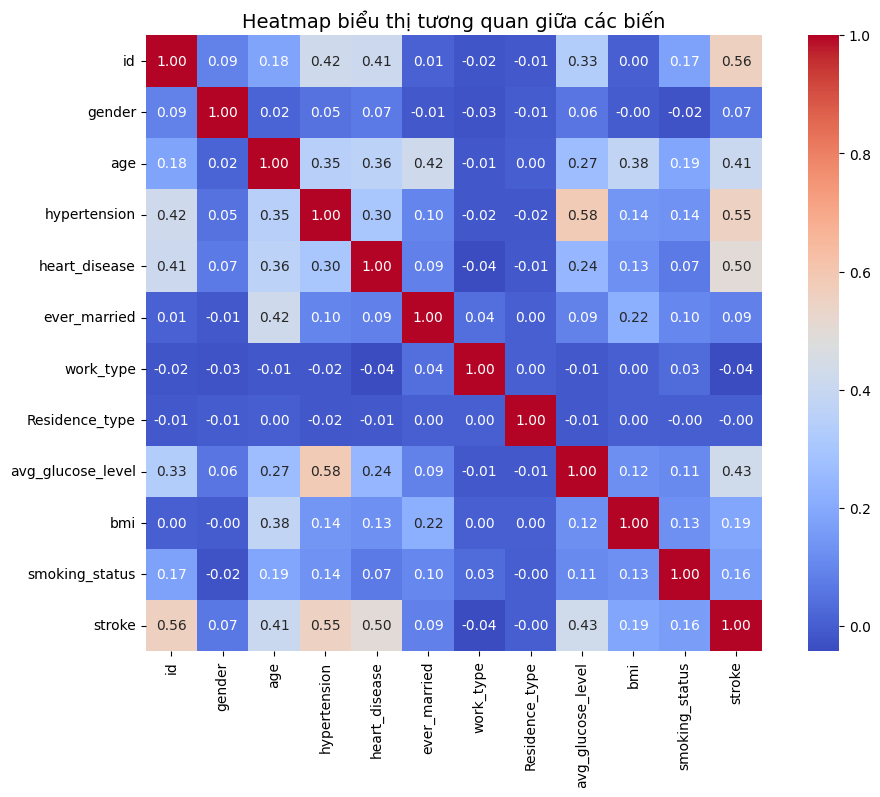

In [12]:
import seaborn as sns

# Tính ma trận tương quan chỉ với các cột số
correlation_matrix = data_encoded.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Heatmap biểu thị tương quan giữa các biến', fontsize=14)
plt.show()
